<a href="https://colab.research.google.com/github/SiLiKhon/HEPStatsSeminar/blob/master/SimpleMLFit.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import scipy.stats as stats
from scipy.optimize import minimize

In [2]:
signal = np.random.normal(loc=125.18, scale=15., size=2000)
background = np.random.exponential(scale=80., size=18000)

data = np.concatenate([signal, background])
#data = data[data < 200.]
print(data.shape)

(20000,)


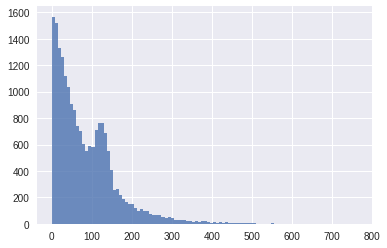

In [3]:
plt.hist(data, bins=100, alpha=0.8);

In [0]:
def ModelPDF(x, params):
  mass, sigma, signal_fraction, exp_slope = params
  pdf = signal_fraction        * stats.norm .pdf(x, loc=mass, scale=sigma) + \
        (1. - signal_fraction) * stats.expon.pdf(x, scale=1./exp_slope)
  return pdf

In [0]:
def NegativeLogLikelihood(params):
  return -np.sum(np.log(ModelPDF(data, params)))

In [14]:
guess = np.array([100., 50, 0.4, 0.01])

result = minimize(NegativeLogLikelihood, guess, method='Nelder-Mead',
                  options={'disp' : True})

Optimization terminated successfully.
         Current function value: 108352.578821
         Iterations: 138
         Function evaluations: 247


In [15]:
print(result)

 final_simplex: (array([[1.25598423e+02, 1.46478751e+01, 1.02167946e-01, 1.24198852e-02],
       [1.25598334e+02, 1.46479497e+01, 1.02167968e-01, 1.24198938e-02],
       [1.25598376e+02, 1.46479185e+01, 1.02168421e-01, 1.24199012e-02],
       [1.25598473e+02, 1.46479258e+01, 1.02168188e-01, 1.24198884e-02],
       [1.25598455e+02, 1.46478591e+01, 1.02167615e-01, 1.24199036e-02]]), array([108352.57882148, 108352.57882149, 108352.57882149, 108352.57882149,
       108352.5788215 ]))
           fun: 108352.57882148487
       message: 'Optimization terminated successfully.'
          nfev: 247
           nit: 138
        status: 0
       success: True
             x: array([1.25598423e+02, 1.46478751e+01, 1.02167946e-01, 1.24198852e-02])


In [0]:
x = np.linspace(0., 500., 200)
y = ModelPDF(x, result.x)

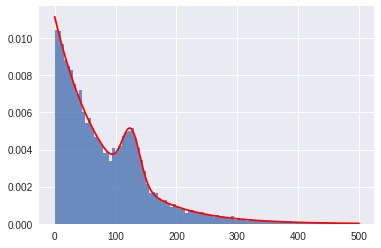

In [20]:
plt.hist(data[data <= 500.], bins=100, alpha=0.8, normed=True);
plt.plot(x, y, color='red');